In [2]:
def mv_average_10(lst):
    mv_lst = []
    for i in range(len(lst)-10):
        mv_lst.append(round(sum(lst[i:i+10]) / 10, 4))
    return mv_lst

14.23
14.39
14.80
15.19
14.14


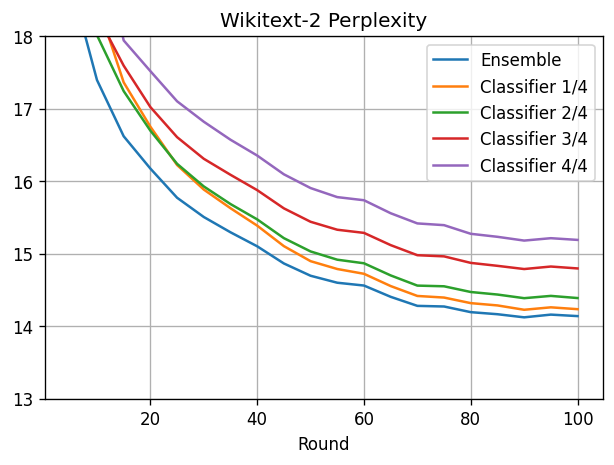

In [27]:
import matplotlib.pyplot as plt
import pickle


with open("wikitext-2/N[100]_iid[1]_K[1]_F[0]_P[0.25,0.25,0.25,0.25]_decay[0.98]_R[120]_RB[1]_FR[0.1]_T[0]_main.pkl", 'rb') as f:
    fedsd_1 = pickle.load(f)

x = [(i+1) * 5 for i in range(len(fedsd_1[0]['multi'])-10)]

plt.figure(dpi=120)
plt.grid(b=True, which='major', axis='both')
plt.title('Wikitext-2 Perplexity')
acc = mv_average_10(fedsd_1[0]['multi'])
acc_1 = mv_average_10([x[0] for x in fedsd_1[0]['single']])
acc_2 = mv_average_10([x[1] for x in fedsd_1[0]['single']])
acc_3 = mv_average_10([x[2] for x in fedsd_1[0]['single']])
acc_4 = mv_average_10([x[3] for x in fedsd_1[0]['single']])

plt.plot(x, acc, label = 'Ensemble')
plt.plot(x, acc_1, label = 'Classifier 1/4')
plt.plot(x, acc_2, label = 'Classifier 2/4')
plt.plot(x, acc_3, label = 'Classifier 3/4')
plt.plot(x, acc_4, label = 'Classifier 4/4')
plt.xlabel("Round") 
plt.legend(loc='upper right')
plt.ylim(13.0, 18.0)


print('{:.2f}'.format(acc_1[-1]))
print('{:.2f}'.format(acc_2[-1]))
print('{:.2f}'.format(acc_3[-1]))
print('{:.2f}'.format(acc_4[-1]))
print('{:.2f}'.format(acc[-1]))


plt.show()


14.23
14.37
14.69
14.92
14.06


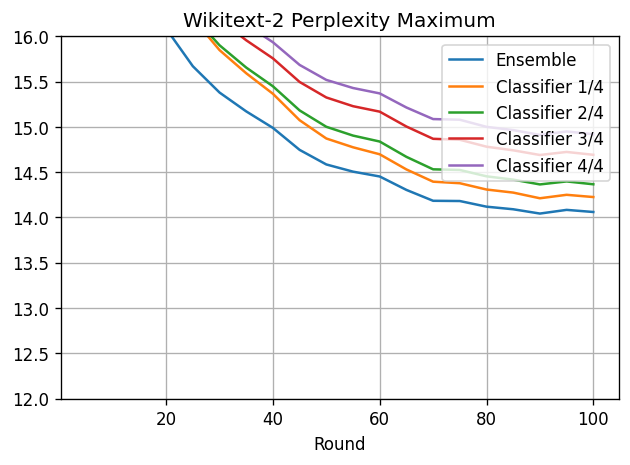

In [36]:
import matplotlib.pyplot as plt
import pickle


with open("wikitext-2/N[100]_iid[1]_K[1]_F[0]_P[0.0,0.0,0.0,1.0]_decay[0.98]_R[120]_RB[0]_FR[0.1]_T[0]_main.pkl", 'rb') as f:
    fedsd_1 = pickle.load(f)

x = [(i+1) * 5 for i in range(len(fedsd_1[0]['multi'])-10)]

plt.figure(dpi=120)
plt.grid(b=True, which='major', axis='both')
plt.title('Wikitext-2 Perplexity Maximum')
acc = mv_average_10(fedsd_1[0]['multi'])
acc_1 = mv_average_10([x[0] for x in fedsd_1[0]['single']])
acc_2 = mv_average_10([x[1] for x in fedsd_1[0]['single']])
acc_3 = mv_average_10([x[2] for x in fedsd_1[0]['single']])
acc_4 = mv_average_10([x[3] for x in fedsd_1[0]['single']])

plt.plot(x, acc, label = 'Ensemble')
plt.plot(x, acc_1, label = 'Classifier 1/4')
plt.plot(x, acc_2, label = 'Classifier 2/4')
plt.plot(x, acc_3, label = 'Classifier 3/4')
plt.plot(x, acc_4, label = 'Classifier 4/4')
plt.xlabel("Round") 
plt.legend(loc='upper right')
plt.ylim(12.0, 16.0)


print('{:.2f}'.format(acc_1[-1]))
print('{:.2f}'.format(acc_2[-1]))
print('{:.2f}'.format(acc_3[-1]))
print('{:.2f}'.format(acc_4[-1]))
print('{:.2f}'.format(acc[-1]))
plt.show()


In [3]:
import torch
a = torch.tensor([[0.1,0.2,0.3],[0.7,0.4,0.3]])

mask = torch.rand(a.shape) < 0.5
#mask_change = mask & (torch.rand(a.shape) < 0.9)
#mask_random = mask_change & (torch.rand(a.shape) < 1/9)

print(mask)

a.masked_scatter_(mask, torch.randint(1,5,mask.shape,dtype=torch.float))

print(a)



tensor([[False, False,  True],
        [ True, False,  True]])
tensor([[0.1000, 0.2000, 2.0000],
        [4.0000, 0.4000, 2.0000]])
